# Métricas y PCA

## Imports

In [31]:
#Datos
from sklearn.datasets import fetch_openml

#Tratamiento de datos
import numpy as np
import pandas as pd

#Visuazacion
import matplotlib.pyplot as plt
import seaborn as sns

#Algorimtos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Visaulizacion decision tree
from sklearn.tree import plot_tree

#Reduccion de dimensionalidad
from sklearn.decomposition import PCA

#Medir el progreso de ejecucion en loops
from tqdm import tqdm

#Estrategia de validacion
from sklearn.model_selection import train_test_split

#Metricas de performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## MNIST dataset

El conjunto de datos mnist_784 proviene de la base de datos MNIST (Modified National Institute of Standards and Technology), que es un conjunto de datos ampliamente utilizado en reconocimiento de imágenes y aprendizaje automático. MNIST es una colección de 70,000 imágenes de dígitos escritos a mano.

Cada imagen en el conjunto de datos MNIST es una imagen en escala de grises de 28x28 píxeles. En la versión mnist_784 de este conjunto de datos, cada imagen se ha "aplanado" en un vector de 1D de 784 características (es decir, 28x28 = 784), donde cada característica representa la intensidad de un píxel en la imagen. Por lo tanto, cada fila en el conjunto de datos mnist_784 representa una imagen.

El objetivo de este conjunto de datos es clasificar correctamente cada imagen en términos del dígito que representa (de 0 a 9). Las etiquetas correctas para cada imagen se proporcionan en el conjunto de datos.

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

## EDA

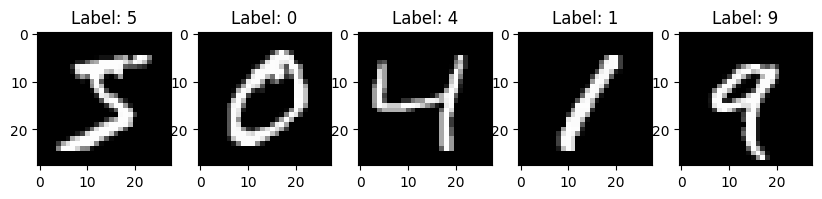

In [6]:
#Imprimimos las primeras 5 imagenes
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(mnist.data.to_numpy()[0:5], mnist.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray,interpolation='nearest')
  plt.title(f"Label: {label}")

In [7]:
#Definimos X (las variables/features) e y (target)
X, y = mnist["data"], mnist["target"]

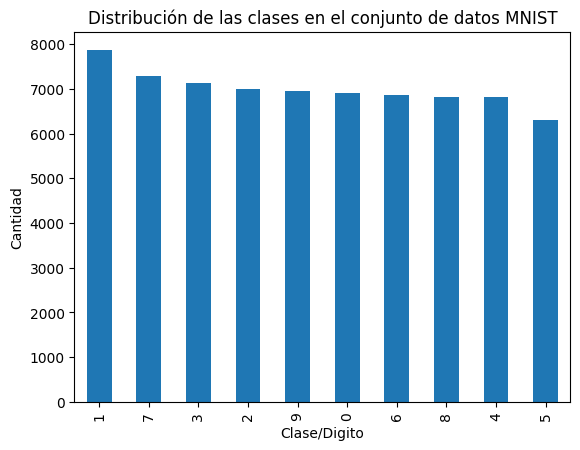

In [8]:
y.value_counts().plot(kind='bar')
plt.title('Distribución de las clases en el conjunto de datos MNIST')
plt.xlabel('Clase/Digito')
plt.ylabel('Cantidad')
plt.show()

In [9]:
#Convertimos cada imagen a matriz 28x28 y las clases a enteros solo a los efectos de un analisis exploratorio
X_image = X.to_numpy().reshape(-1, 28, 28)
y_image = y.astype(int)

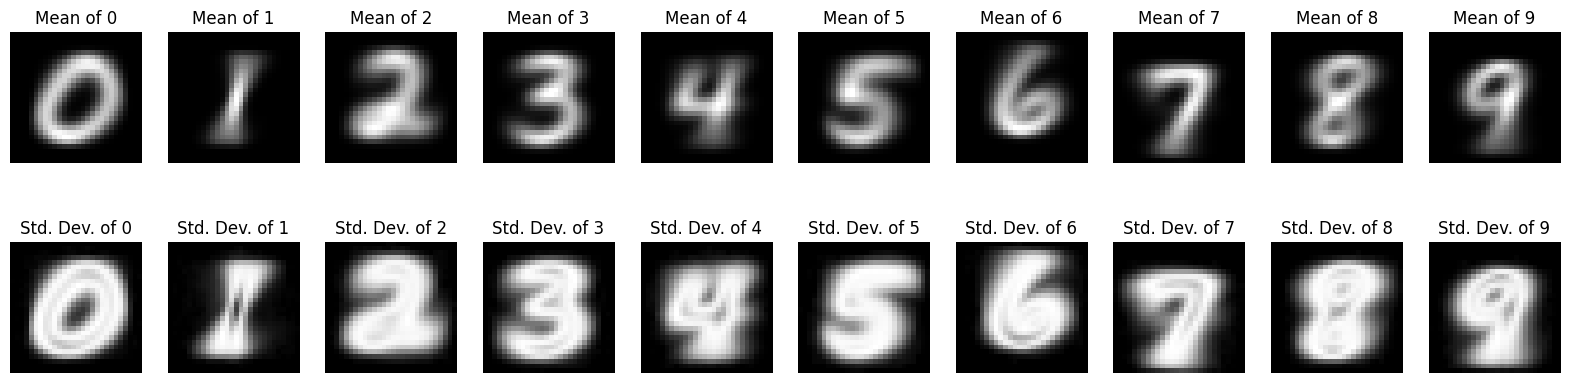

In [10]:
# Calculamos la imagen promedio y la desviación estándar para cada dígito
mean_images = []
std_images = []
for i in range(10):
    mean_images.append(np.mean(X_image[y_image==i], axis=0))
    std_images.append(np.std(X_image[y_image==i], axis=0))

# Visualizamos las imágenes promedio y las desviaciones estándar
fig, axs = plt.subplots(2, 10, figsize=(20, 5))

for i, (mean_img, std_img) in enumerate(zip(mean_images, std_images)):
    axs[0, i].imshow(mean_img, cmap=plt.cm.gray,interpolation='nearest')
    axs[0, i].set_title(f"Mean of {i}")
    axs[0, i].axis('off')

    axs[1, i].imshow(std_img, cmap=plt.cm.gray,interpolation='nearest')
    axs[1, i].set_title(f"Std. Dev. of {i}")
    axs[1, i].axis('off')

plt.show()

## PCA

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es un método estadístico que se utiliza para reducir la dimensionalidad de un conjunto de datos, mientras se conserva la mayor cantidad posible de la variación en los datos.

PCA transforma el conjunto de datos original a un nuevo sistema de coordenadas en el que la base está formada por los vectores propios. Los nuevos ejes (o componentes principales) son ortogonales entre sí y capturan la mayor variación en los datos.

Una de las ventajas de PCA es que al reducir la dimensionalidad del conjunto de datos, también puede ayudar a aliviar problemas de tiempos de ejecución que pueden surgir al trabajar con conjuntos de datos de alta dimensión. También se utiliza frecuentemente para la visualización de datos de alta dimensión.

In [11]:
n_components = 50  # Nueva cantidad de features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

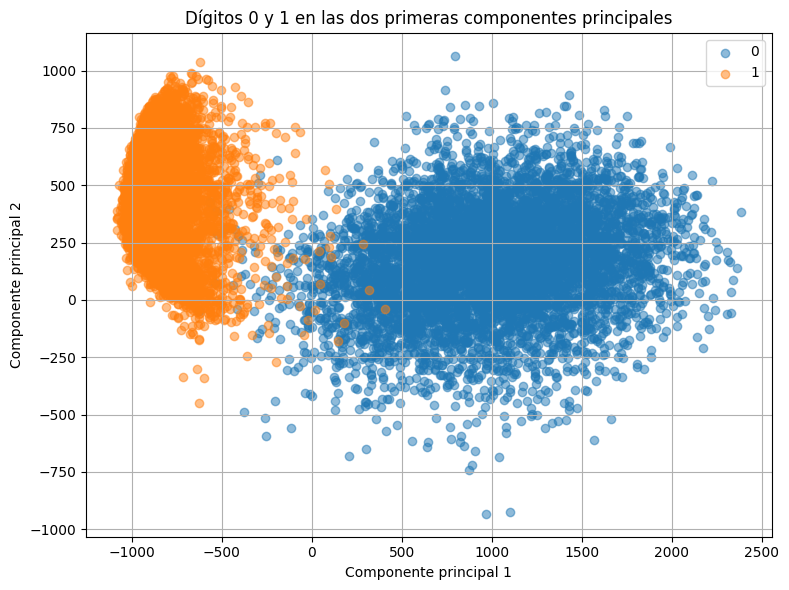

In [19]:
# Seleccionar 0s y 1s
mask = (y == '0') | (y == '1')
X_pca_01 = X_pca[mask]
y_01 = y[mask]

# Tomar solo las primeras dos componentes para graficar
X_plot = X_pca_01[:, :2]

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_plot[y_01 == '0', 0], X_plot[y_01 == '0', 1], alpha=0.5, label='0')
plt.scatter(X_plot[y_01 == '1', 0], X_plot[y_01 == '1', 1], alpha=0.5, label='1')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Dígitos 0 y 1 en las dos primeras componentes principales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

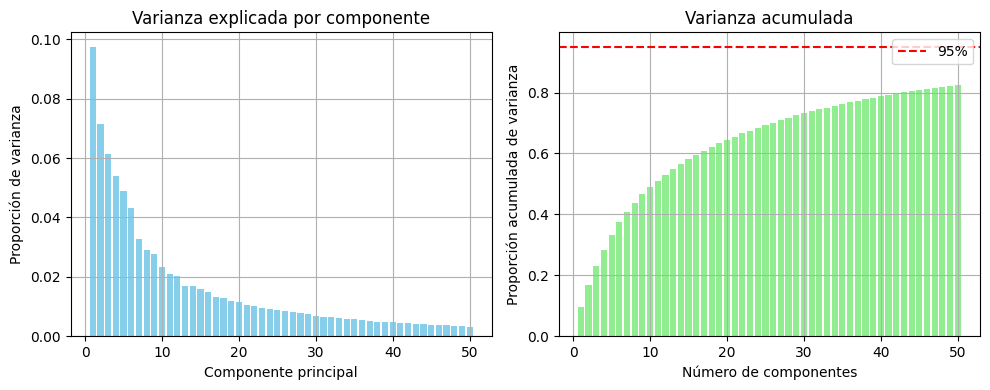

In [23]:
# Obtener varianzas
var_explicada = pca.explained_variance_ratio_
var_acumulada = np.cumsum(var_explicada)

# Gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Varianza explicada
ax1.bar(range(1, len(var_explicada)+1), var_explicada, color='skyblue')
ax1.set_title('Varianza explicada por componente')
ax1.set_xlabel('Componente principal')
ax1.set_ylabel('Proporción de varianza')
ax1.grid(True)

# Varianza acumulada
ax2.bar(range(1, len(var_acumulada)+1), var_acumulada, color='lightgreen')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95%')
ax2.set_title('Varianza acumulada')
ax2.set_xlabel('Número de componentes')
ax2.set_ylabel('Proporción acumulada de varianza')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [24]:
pd.DataFrame(X_pca).shape

(70000, 50)

In [30]:
# Vamos a seleccionar 30k imagenes para realizar el entrenamiento y las predicciones (por un tema de tiempos de ejecucion)
# Seteamos ademas una semilla para tener reproducibilidad
np.random.seed(42)
random_indices = np.random.choice(
    X_pca.shape[0],
    size = 30000,
    replace=False
    )

# Seleccionamos las imagenes y su target
X_dev = X_pca[random_indices]
y_dev = y.iloc[random_indices]

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.3, random_state=42)

## KNN

### Entrenamiento

In [44]:
# Elegimos el k
k=30

In [45]:
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

In [46]:
y_train_pred =knn.predict(X_train)
y_val_pred = knn.predict(X_val)

In [47]:
from re import A
print('Accuracy train:',accuracy_score(y_train,y_train_pred))
print('Accuracy test: ', accuracy_score(y_val,y_val_pred))

Accuracy train: 0.9563333333333334
Accuracy test:  0.9546666666666667


In [48]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2032
           1       0.93      0.99      0.96      2398
           2       0.97      0.94      0.96      2077
           3       0.96      0.94      0.95      2095
           4       0.98      0.94      0.96      2011
           5       0.95      0.95      0.95      1910
           6       0.96      0.99      0.97      2113
           7       0.95      0.96      0.95      2230
           8       0.98      0.91      0.95      2028
           9       0.92      0.94      0.93      2106

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [49]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       935
           1       0.93      0.99      0.96       983
           2       0.97      0.94      0.95       927
           3       0.96      0.94      0.95       934
           4       0.98      0.93      0.95       833
           5       0.94      0.94      0.94       789
           6       0.96      0.98      0.97       862
           7       0.95      0.95      0.95       955
           8       0.97      0.92      0.94       859
           9       0.93      0.96      0.94       923

    accuracy                           0.95      9000
   macro avg       0.96      0.95      0.95      9000
weighted avg       0.96      0.95      0.95      9000



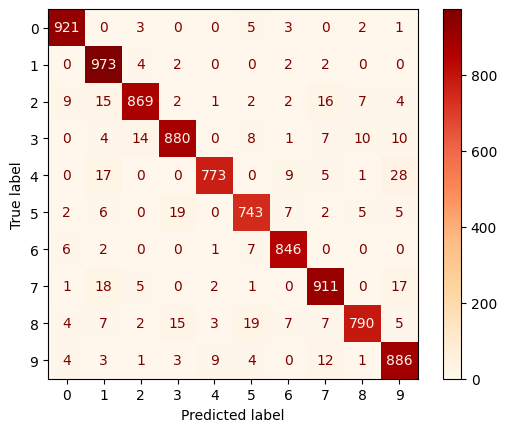

In [50]:
cm=confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="OrRd")

### Error en funcion del K

In [51]:
errors_train = []
errors_val = []

for K in tqdm(range(1,20)):
    knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    errors_train.append(1-accuracy_score(y_train,y_train_pred))
    errors_val.append(1-accuracy_score(y_val,y_val_pred))

100%|██████████| 19/19 [02:24<00:00,  7.59s/it]


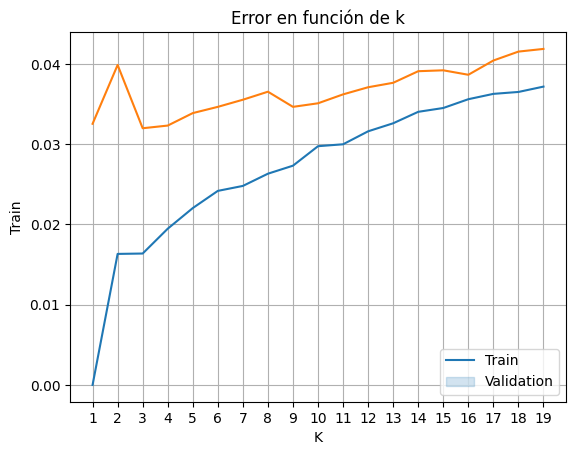

In [52]:
df_errors = pd.DataFrame({"K":range(1,20), "Train":errors_train, "Validation":errors_val})
line_plot_errors = sns.lineplot(
    data=df_errors,
    x="K", y="Train"
)
sns.lineplot(
    data=df_errors,
    x="K", y="Validation"
)
plt.xticks(range(1, 20))
plt.title("Error en función de k")
plt.legend(["Train", "Validation"])
plt.grid(True)
plt.show()